In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -Uqq fastbook
from fastbook import *
from fastai.vision.widgets import *
import os

In [ ]:
# path to images
path = "drive/MyDrive/Images"

In [ ]:
# create data block
dblock = DataBlock(blocks = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y = parent_label,
                   splitter = RandomSplitter(),
                   item_tfms = Resize(224))

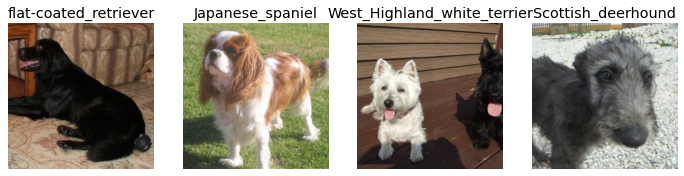

In [ ]:
dls = dblock.dataloaders(path)
dls.show_batch(max_n=4, nrows=1)

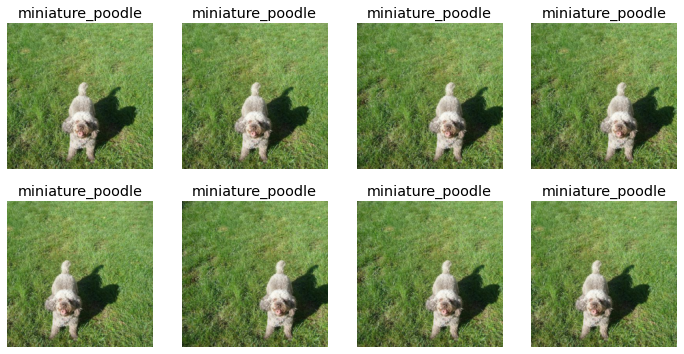

In [ ]:
# load data and use data augmentationi
dogs = dblock.new(item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))
dlsDogs = dogs.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.005248074419796467)

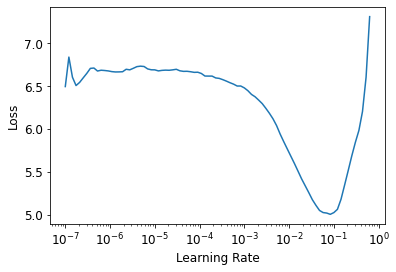

In [ ]:
# finetune pretrained model
# using 4 epochs
learnBreed = cnn_learner(dlsDogs, resnet34, metrics=error_rate)
learnBreed.lr_find()

In [ ]:
# actually fine tuning
learnBreed.fine_tune(10, 0.005)

epoch,train_loss,valid_loss,error_rate,time
0,1.358178,0.775194,0.224381,03:21


epoch,train_loss,valid_loss,error_rate,time
0,0.923193,0.659241,0.201311,03:33
1,1.124424,0.970145,0.285090,03:33
2,1.197366,1.160109,0.335114,03:35
3,1.078374,1.019339,0.295289,03:38
4,0.822805,0.937764,0.274891,03:34
5,0.616756,0.886383,0.250850,03:34
6,0.432264,0.780963,0.217339,03:34
7,0.277951,0.726405,0.200583,03:32
8,0.189384,0.676878,0.183099,03:34
9,0.141818,0.667409,0.179699,03:38


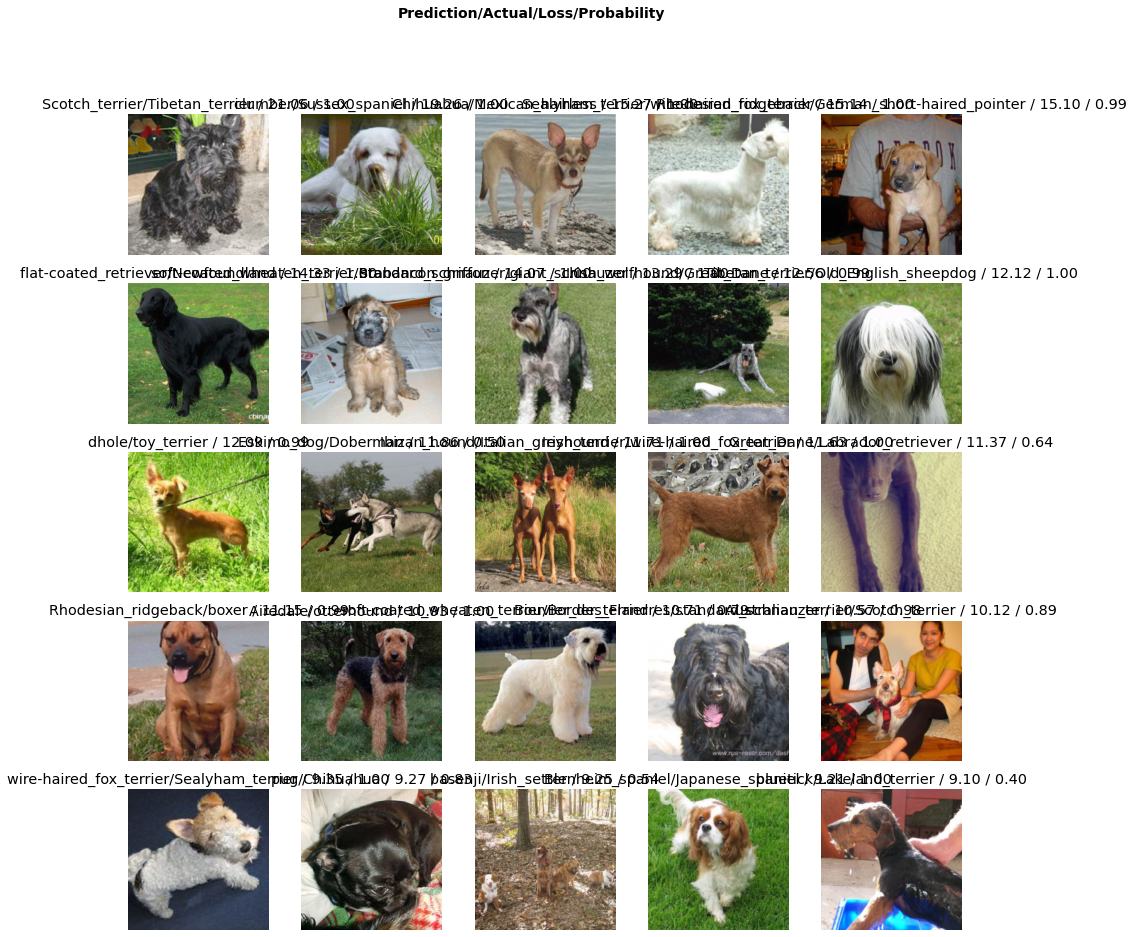

In [ ]:
# plot top losses, i.e. largest loss metric
interp = ClassificationInterpretation.from_learner(learnBreed)
interp.plot_top_losses(25, nrows=5)

In [ ]:
# look at most incorrect / unsure classified pictures to find possibly faulty images
cleaner = ImageClassifierCleaner(learnBreed)
cleaner

In [ ]:
# export model and download file
learnBreed.export()
from google.colab import files
files.download('export.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>